## Globe tossing experiment

In [1]:
import sys
sys.path.append('../')
import pystan
import stan_utility

import arviz as az
import numpy as np
import scipy.stats as stats

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

light="#FFFCDC"
light_highlight="#FEF590"
mid="#FDED2A"
mid_highlight="#f0dc05"
dark="#EECA02"
dark_highlight="#BB9700"
green="#00FF00"
light_grey="#DDDDDD"

plt.style.context('seaborn-white')
mpl.rcParams['figure.dpi']= 200


## Non-informative uniform prior

### Prior predictive distribution
We can use stan to simulate possible outputs and parameteres based only on prior information.

In [3]:
with open('globe_prior.stan', 'r') as file:
    print(file.read())

data {
  int N;
}

generated quantities {
  real<lower=0,upper=1>theta=uniform_rng(0,1);
  int<lower=0>S_sim=binomial_rng(N,theta);
}



In [4]:
model_prior=stan_utility.compile_model('globe_prior.stan')

Using cached StanModel


In [5]:
R=1000
sim_uf=model_prior.sampling(data={'N':11},algorithm="Fixed_param", iter=R, warmup=0, chains=1, refresh=R,
                     seed=29042020)

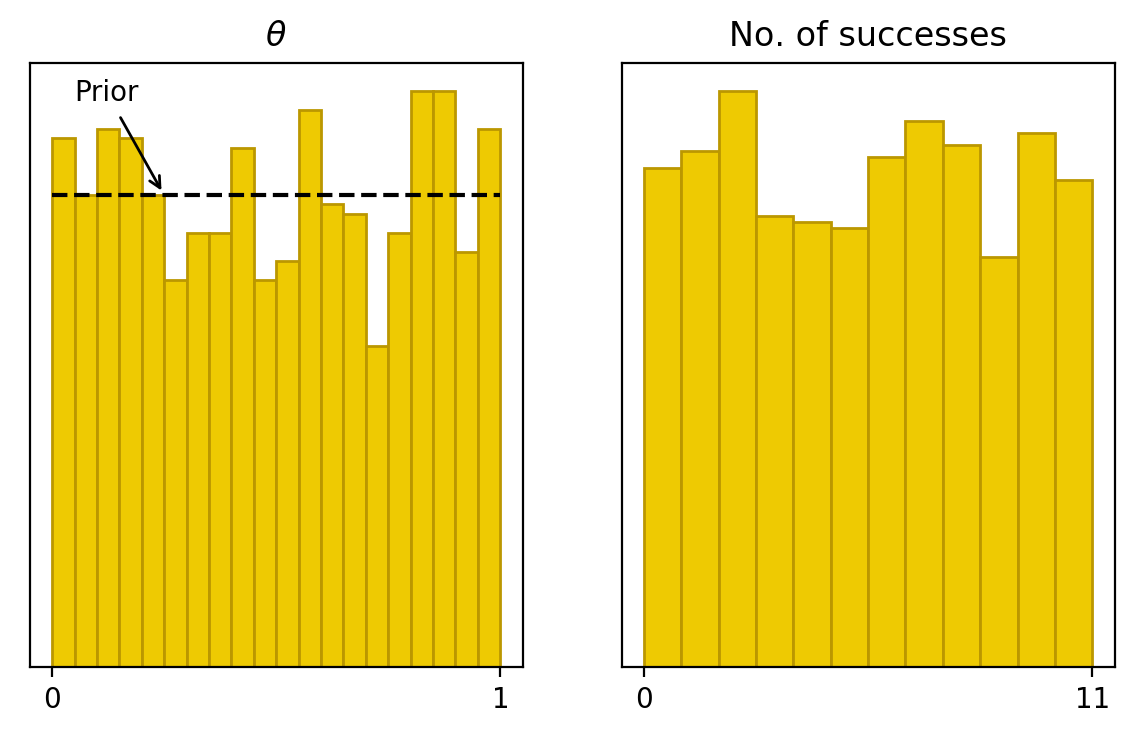

In [11]:
params=sim_uf.extract()
theta=params['theta']
S_sim=params['S_sim']

fig, axes = plt.subplots(1, 2, figsize=(7, 4))

ax1=axes[0]
ax1.hist(theta,bins=20,color=dark,edgecolor=dark_highlight,density=True)
x=np.linspace(0,1,100)
ax1.plot(x,stats.uniform.pdf(x),color='black',linestyle='--')
ax1.set_xticks([0,1])
ax1.set_yticks([])
ax1.set_title(r'$\theta$')
ax1.annotate('Prior',xy=(0.25,1),xytext=(0.05,1.2),arrowprops={'arrowstyle':'->'})
ax2=axes[1]
ax2.hist(S_sim,color=dark,edgecolor=dark_highlight,density=True,bins=12)
ax2.set_xticks([0,11])
ax2.set_yticks([])
ax2.set_title('No. of successes')
plt.show()

### Posterior parameter estimation and posterior predictive distribution

In [12]:
with open('globe_fit.stan', 'r') as file:
    print(file.read())

data {
  int S; //number of successes
  int N; //number of trials
}

parameters {
  real <lower=0,upper=1> theta;
}

model {
  theta ~ beta(1,1);//uniform prior
  S ~ binomial(N,theta);
}
generated quantities {
  int S_sim=0;
  S_sim = binomial_rng(N,theta);
}



In [13]:
model=stan_utility.compile_model('globe_fit.stan')

Using cached StanModel


In [14]:
data = dict(S = 7,
            N = 11)
fit = model.sampling(data=data, seed=26042020)

In [15]:
stan_utility.check_all_diagnostics(fit)

n_eff / iter looks reasonable for all parameters
Rhat looks reasonable for all parameters
0.0 of 4000 iterations ended with a divergence (0.0%)
0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


In [16]:
params=fit.extract()
theta=params['theta']
S_sim=params['S_sim']

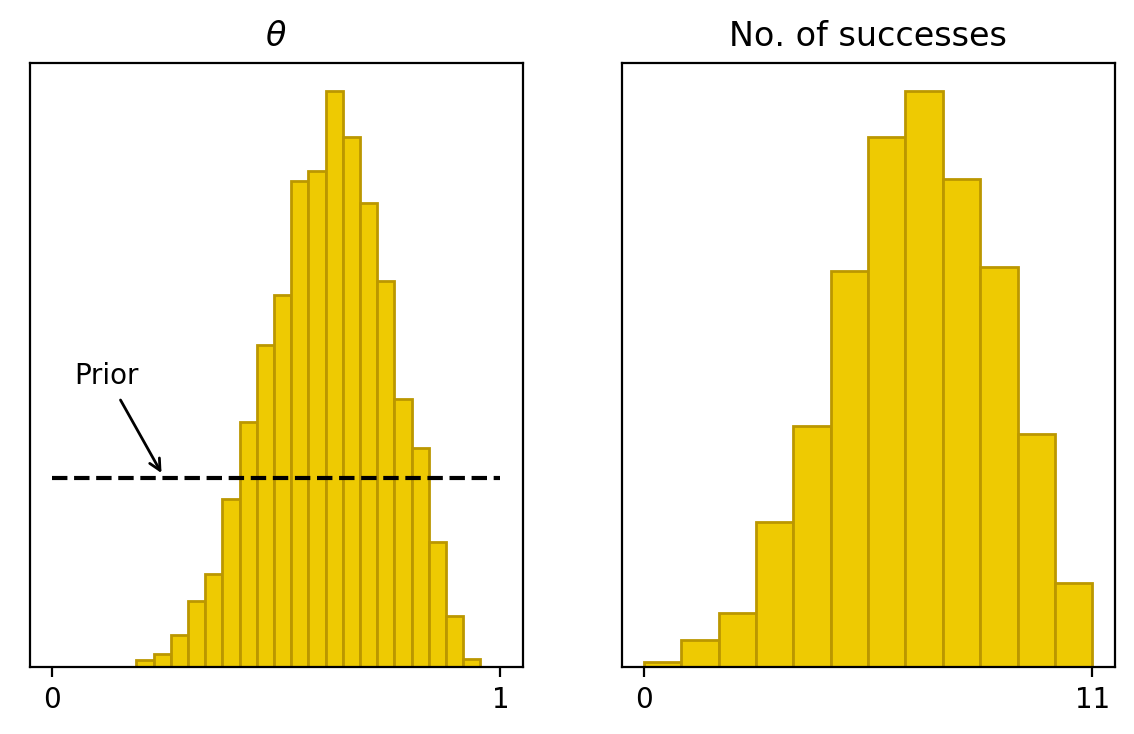

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))
ax1=axes[0]
ax1.hist(theta,bins=20,color=dark,edgecolor=dark_highlight,density=True)
x=np.linspace(0,1,100)
ax1.plot(x,stats.uniform.pdf(x),color='black',linestyle='--')
ax1.set_xticks([0,1])
ax1.set_yticks([])
ax1.set_title(r'$\theta$')
ax1.annotate('Prior',xy=(0.25,1),xytext=(0.05,1.5),arrowprops={'arrowstyle':'->'})
ax2=axes[1]
ax2.hist(S_sim,color=dark,edgecolor=dark_highlight,density=True,bins=12)
ax2.set_xticks([0,11])
ax2.set_yticks([])
ax2.set_title('No. of successes')
plt.show()

In [18]:
np.median(theta)

0.6215469651306377

In [19]:
az.hpd(theta,0.94)

array([0.38211383, 0.86758171])

## Normal prior
### Prior predictive distribution

In [20]:
with open('globe_prior_normal.stan', 'r') as file:
    print(file.read())


data {
  int N;
}

generated quantities {
  real<lower=0,upper=1>theta=fabs(fmin(1,normal_rng(0.5,0.15)));
  int<lower=0>S_sim=binomial_rng(N,theta);
}



In [21]:
model_prior_normal=stan_utility.compile_model('globe_prior_normal.stan')

Using cached StanModel


In [22]:
R=1000
sim_nm=model_prior_normal.sampling(data={'N':11},algorithm="Fixed_param", iter=R, warmup=0, chains=1, refresh=R,
                     seed=29042020)

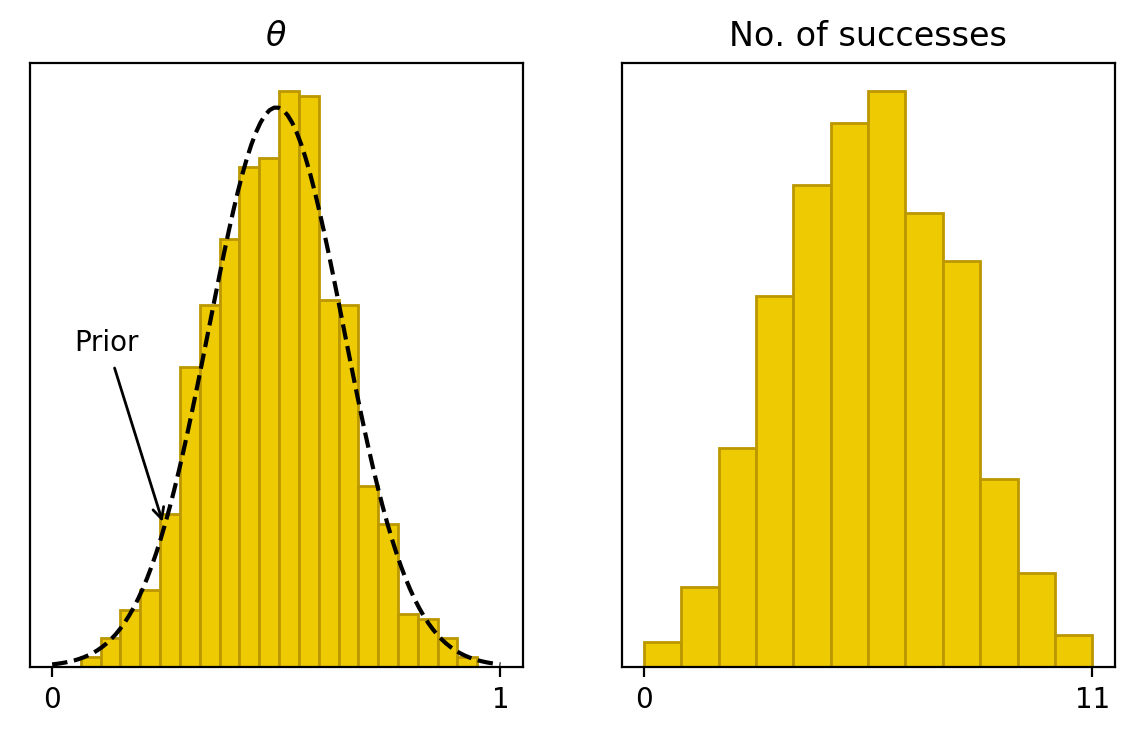

In [23]:
params=sim_nm.extract()
theta=params['theta']
S_sim=params['S_sim']
fig, axes = plt.subplots(1, 2, figsize=(7, 4))
ax1=axes[0]
ax1.hist(theta,bins=20,color=dark,edgecolor=dark_highlight,density=True)
x=np.linspace(0,1,100)
ax1.plot(x,stats.norm.pdf(x,0.5,0.15),color='black',linestyle='--')
ax1.set_xticks([0,1])
ax1.set_yticks([])
ax1.set_title(r'$\theta$')
ax1.annotate('Prior',xy=(0.25,stats.norm.pdf(0.25,0.5,0.15)),xytext=(0.05,1.5),arrowprops={'arrowstyle':'->'})
ax2=axes[1]
ax2.hist(S_sim,color=dark,edgecolor=dark_highlight,density=True,bins=12)
ax2.set_yticks([])
ax2.set_xticks([0,11])
ax2.set_title('No. of successes')
plt.show()

### Posterior parameter estimation and posterior predictive distribution

In [18]:
with open('globe_fit_normal.stan', 'r') as file:
    print(file.read())

data {
  int S; //number of successes
  int N; //number of trials
}

parameters {
  real <lower=0,upper=1> theta;
}

model {
  theta ~ normal(0.5,0.15);
  S ~ binomial(N,theta);
}
generated quantities {
  int S_sim=0;
  S_sim = binomial_rng(N,theta);
}



In [24]:
model_normal=stan_utility.compile_model('globe_fit_normal.stan')

Using cached StanModel


In [25]:
data = dict(S = 7,
            N = 11)
fit_normal = model.sampling(data=data, seed=26042020)
stan_utility.check_all_diagnostics(fit_normal)

n_eff / iter looks reasonable for all parameters
Rhat looks reasonable for all parameters
0.0 of 4000 iterations ended with a divergence (0.0%)
0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


In [26]:
params=fit_normal.extract()
theta=params['theta']
S_sim=params['S_sim']

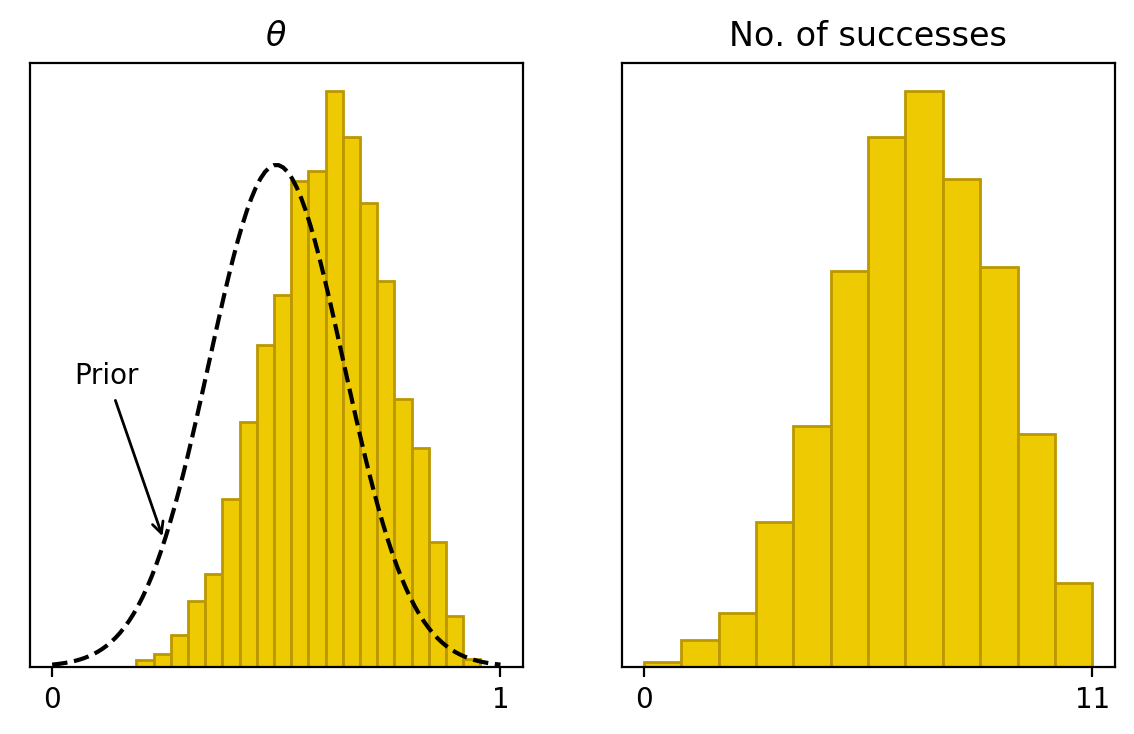

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))

ax1=axes[0]
ax1.hist(theta,bins=20,color=dark,edgecolor=dark_highlight,density=True)
x=np.linspace(0,1,100)
ax1.plot(x,stats.norm.pdf(x,0.5,0.15),color='black',linestyle='--')
ax1.set_xticks([0,1])
ax1.set_yticks([])
ax1.set_title(r'$\theta$')
ax1.annotate('Prior',xy=(0.25,stats.norm.pdf(0.25,0.5,0.15)),xytext=(0.05,1.5),arrowprops={'arrowstyle':'->'})
ax2=axes[1]
ax2.hist(S_sim,color=dark,edgecolor=dark_highlight,density=True,bins=12)
ax2.set_yticks([])
ax2.set_xticks([0,11])
ax2.set_title('No. of successes')
plt.show()

In [28]:
np.median(theta)

0.6215469651306377

In [29]:
az.hpd(theta,0.94)

array([0.38211383, 0.86758171])